In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:

img = cv2.imread('Lenna.png',0)
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

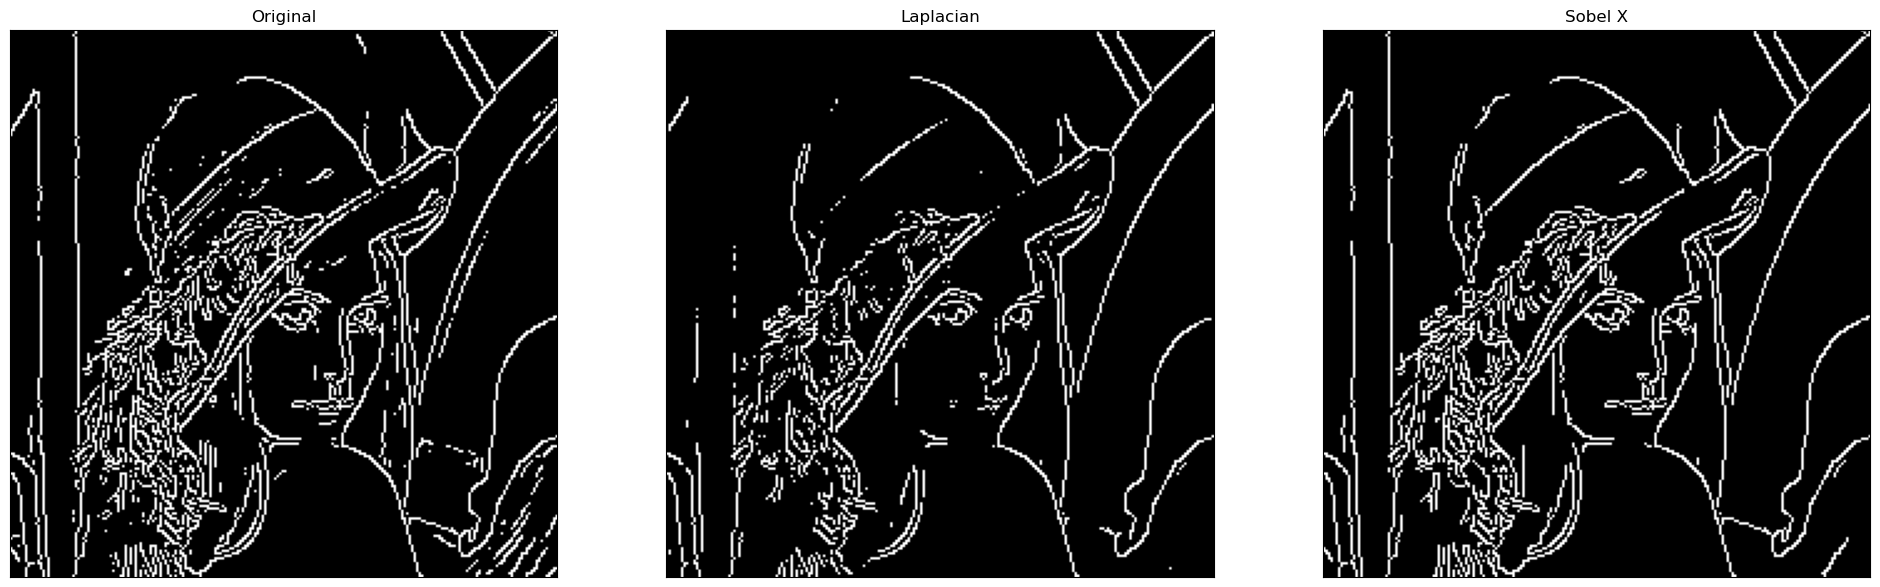

In [11]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(edges100,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges200,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


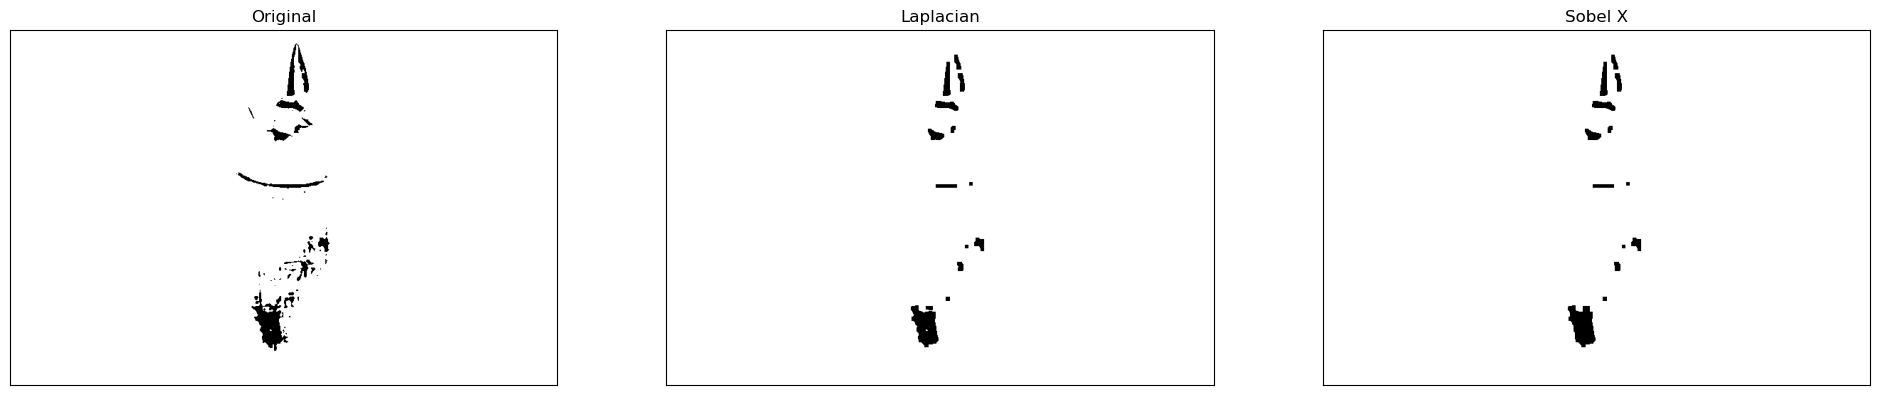

In [21]:
im = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)


kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh, cmap ='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(closing, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

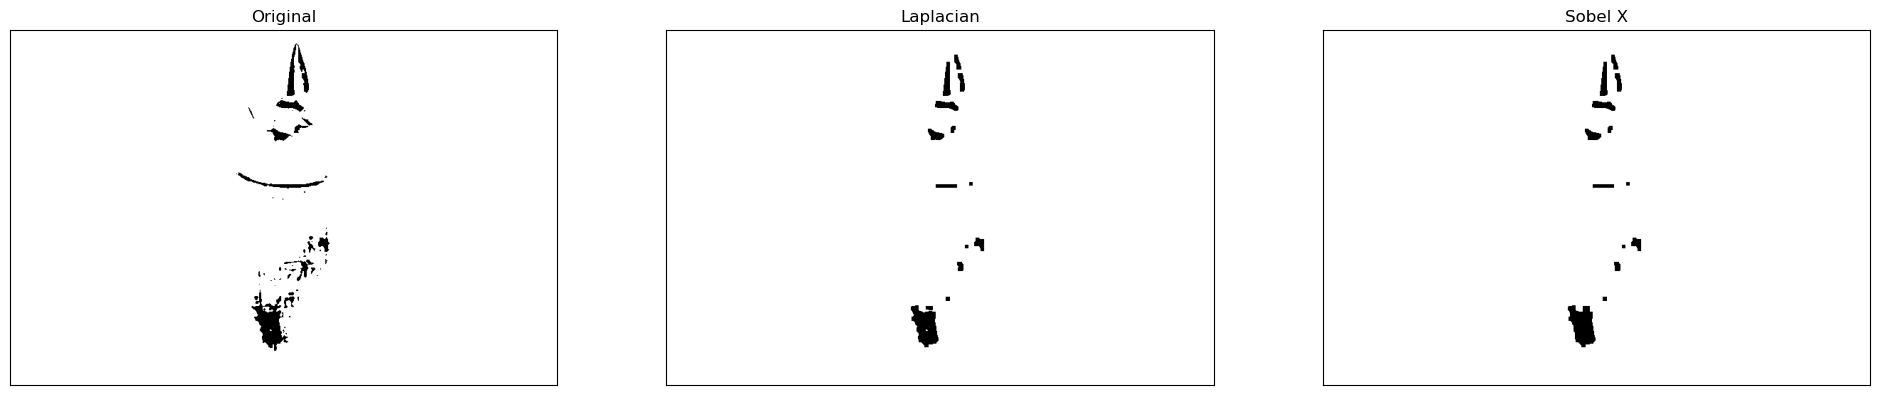

In [25]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh, cmap ='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(closing, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
import numpy as np
import cv2

def run_main():
    cap = cv2.VideoCapture(0)
    cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, 720)

    while(True):
        ret, frame = cap.read()
        roi = frame[0:500, 0:500]
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
        thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

        kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

        cont_img = closing.copy()
        contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 2000 or area > 4000:
                continue

            if len(cnt) < 5:
                continue

            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(roi, ellipse, (0,255,0), 2)

        cv2.imshow("Morphological Closing", closing)
        cv2.imshow("Adaptive Thresholding", thresh)
        cv2.imshow('Contours', roi)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if coin == "coin":
    run_main()

NameError: name 'coin' is not defined